In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
import numpy as np

dataframes = ['(df_desc_train, df_desc_test)', '(df_fp_train, df_fp_test)',
              '(df_emb_train, df_emb_test)', '(df_atomic_train, df_atomic_test)']

ablation_results = {}

for ablation_idx in range(len(dataframes)):
    print(f"========== Ablation: Excluding feature at index {ablation_idx} ==========")
    excluded_dataframe = dataframes[ablation_idx]
    print('Excluded dataframe:', excluded_dataframe)

    ablated_dataframes = [pair for i, pair in enumerate(dataframes) if i != ablation_idx]
    print('Ablated index', ablation_idx, '----->', 'Ablated_dataframes', ablated_dataframes)





========== Ablation: Excluding feature at index 0 ==========
Excluded dataframe: (df_desc_train, df_desc_test)
Ablated index 0 -----> Ablated_dataframes ['(df_fp_train, df_fp_test)', '(df_emb_train, df_emb_test)', '(df_atomic_train, df_atomic_test)']
========== Ablation: Excluding feature at index 1 ==========
Excluded dataframe: (df_fp_train, df_fp_test)
Ablated index 1 -----> Ablated_dataframes ['(df_desc_train, df_desc_test)', '(df_emb_train, df_emb_test)', '(df_atomic_train, df_atomic_test)']
========== Ablation: Excluding feature at index 2 ==========
Excluded dataframe: (df_emb_train, df_emb_test)
Ablated index 2 -----> Ablated_dataframes ['(df_desc_train, df_desc_test)', '(df_fp_train, df_fp_test)', '(df_atomic_train, df_atomic_test)']
========== Ablation: Excluding feature at index 3 ==========
Excluded dataframe: (df_atomic_train, df_atomic_test)
Ablated index 3 -----> Ablated_dataframes ['(df_desc_train, df_desc_test)', '(df_fp_train, df_fp_test)', '(df_emb_train, df_emb_test

In [10]:
ablation_result_dir = '/home/users/akshay/PCPpred/Caco2/results/Ablation/'

ablation_results = {}
for filename in os.listdir(ablation_result_dir):
    if filename.endswith('.csv'):
        ablation_label = filename.replace('.csv', '').replace("Ablation_", "")
        print(ablation_label)
        file_path = os.path.join(ablation_result_dir, filename)
    
        ablation_results[ablation_label] = pd.read_csv(file_path, index_col=0)


ablation_results

Descriptor
Atomic
Embeddings
Fingerprints


{'Descriptor':                            Train MSE (5 fold CV)  Train MAE (5 fold CV)  \
 LGBMRegressor                           0.158338               0.294101   
 DecisionTreeRegressor                   0.289521               0.402188   
 RandomForestRegressor                   0.149608               0.286725   
 GradientBoostingRegressor               0.152904               0.291063   
 AdaBoostRegressor                       0.172118               0.315982   
 XGBRegressor                            0.176798               0.314544   
 ExtraTreesRegressor                     0.150305               0.287463   
 LinearRegression                        0.154187               0.296893   
 KNeighborsRegressor                     0.173353               0.310813   
 SVR                                     0.163390               0.299419   
 MLPRegressor                            0.188291               0.330079   
 
                            Train RMSE (5 fold CV)  Train R2 (5 fold CV)

In [11]:
ablation_results.items()

dict_items([('Descriptor',                            Train MSE (5 fold CV)  Train MAE (5 fold CV)  \
LGBMRegressor                           0.158338               0.294101   
DecisionTreeRegressor                   0.289521               0.402188   
RandomForestRegressor                   0.149608               0.286725   
GradientBoostingRegressor               0.152904               0.291063   
AdaBoostRegressor                       0.172118               0.315982   
XGBRegressor                            0.176798               0.314544   
ExtraTreesRegressor                     0.150305               0.287463   
LinearRegression                        0.154187               0.296893   
KNeighborsRegressor                     0.173353               0.310813   
SVR                                     0.163390               0.299419   
MLPRegressor                            0.188291               0.330079   

                           Train RMSE (5 fold CV)  Train R2 (5 fold CV) 

/tmp/ipykernel_3721628/651902975.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_bars).colors


Saved plot for Test MSE to /home/users/akshay/PCPpred/Caco2/results/Ablation/plots/Test_MSE.png


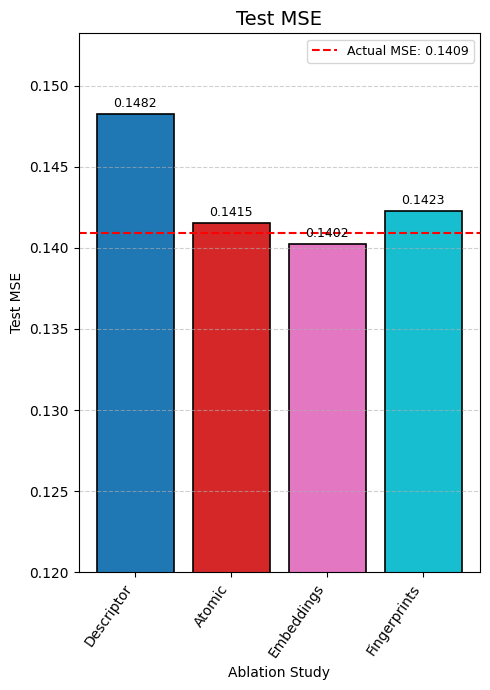

Saved plot for Test MAE to /home/users/akshay/PCPpred/Caco2/results/Ablation/plots/Test_MAE.png


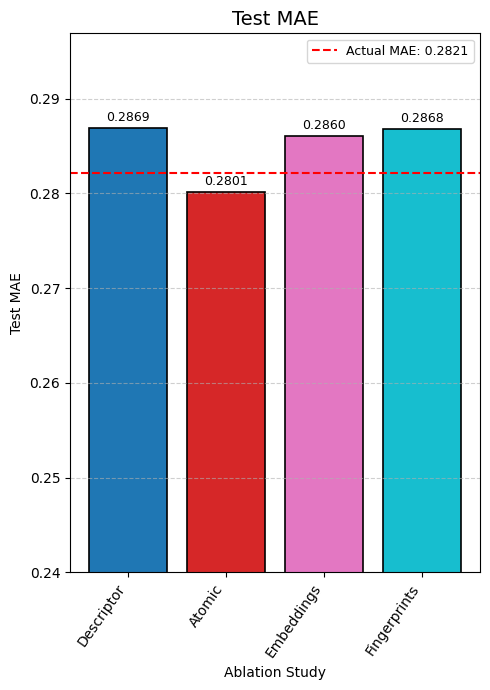

Saved plot for Test RMSE to /home/users/akshay/PCPpred/Caco2/results/Ablation/plots/Test_RMSE.png


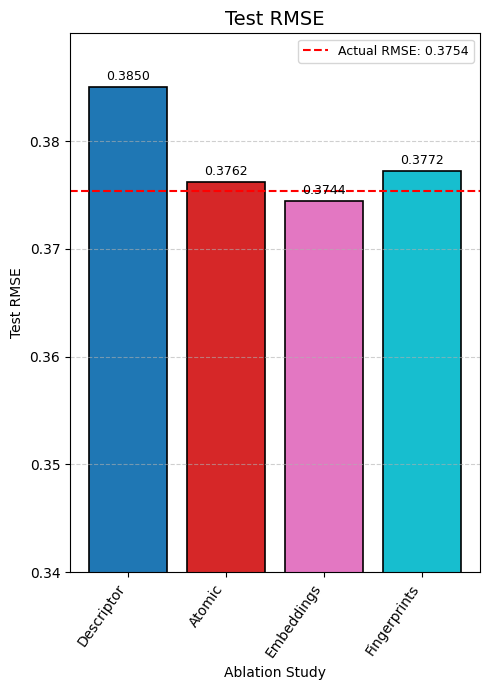

Saved plot for Test R2 to /home/users/akshay/PCPpred/Caco2/results/Ablation/plots/Test_R2.png


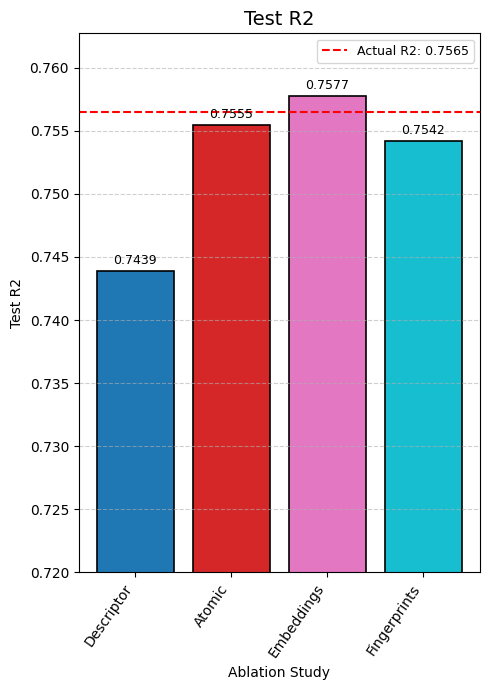

Saved plot for Test PCC to /home/users/akshay/PCPpred/Caco2/results/Ablation/plots/Test_PCC.png


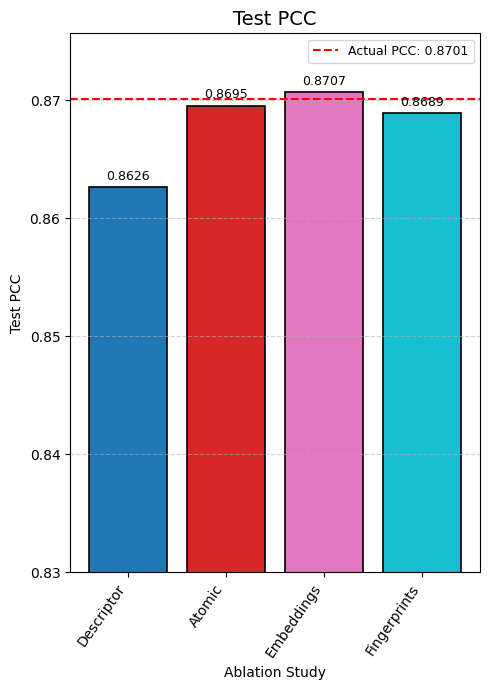

Saved plot for Test SCC to /home/users/akshay/PCPpred/Caco2/results/Ablation/plots/Test_SCC.png


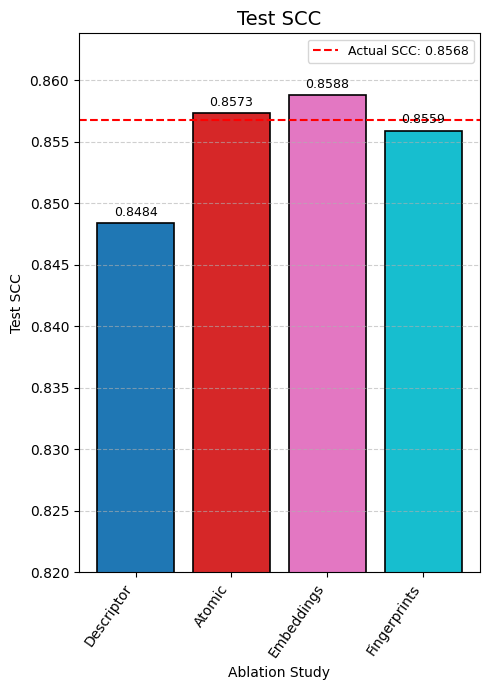

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import pandas as pd

plots_dir = '/home/users/akshay/PCPpred/Caco2/results/Ablation/plots'
os.makedirs(plots_dir, exist_ok=True)
 	 	 	 	 	
actual_values = {
    "Test MSE": 0.1409,
    "Test MAE": 0.2821,
    "Test RMSE": 0.3754,
    "Test R2": 0.7565,
    "Test PCC": 0.8701,
    "Test SCC": 0.8568
}

metrics = ["Test MSE", "Test MAE", "Test RMSE", "Test R2", "Test PCC", "Test SCC"]
num_bars = len(ablation_results)
colors = cm.get_cmap('tab10', num_bars).colors

for metric in metrics:
    metric_data = {label: df.loc["SVR", metric] for label, df in ablation_results.items()}
    metric_series = pd.Series(metric_data)

    fig, ax = plt.subplots(figsize=(5, 7))
    bars = ax.bar(metric_series.index, metric_series.values, color=colors, edgecolor='black', linewidth=1.2)

    y_max = metric_series.max()
    if metric == 'Test R2':
        ax.set_ylim(0.72, y_max + 0.005)
    if metric == 'Test MSE':
        ax.set_ylim(0.12, y_max + 0.005)
    if metric == 'Test RMSE':
        ax.set_ylim(0.34, y_max + 0.005)
    if metric == 'Test PCC':
        ax.set_ylim(0.83, y_max + 0.005)
    if metric == 'Test SCC':
        ax.set_ylim(0.82, y_max + 0.005)
    if metric == 'Test MAE':
        ax.set_ylim(0.24, y_max + 0.01)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

    actual_value = actual_values[metric]
    ax.axhline(y=actual_value, color='red', linestyle='--', linewidth=1.5,
               label=f'Actual {metric.split()[-1]}: {actual_value:.4f}')

    ax.legend(loc='upper right', fontsize=9)

    ax.set_title(f'{metric}', fontsize=14)
    ax.set_xlabel('Ablation Study', fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.set_xticks(range(len(metric_series)))
    ax.set_xticklabels(metric_series.index, rotation=55, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    save_path = os.path.join(plots_dir, f"{metric.replace(' ', '_')}.png")
    plt.savefig(save_path, dpi=300)
    print(f"Saved plot for {metric} to {save_path}")
    plt.show()
